# **LAB 5**
### **Q1. Quadratic Discriminant Analysis (QDA) is a Baysian generative model that comes up with a non-linear (quadratic, specifically) decision boundary with the assumption that each class follows a normal distribution and has its own covariance matrix (contrary to Linear Discriminant Analysis, which assumes each class having same covariance matrix). [45]**
Dataset : [iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/) \

In [132]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab 5/iris_data.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



A. Preprocess the data and split in training and test set in 70:30 ratio and make sure all
classes are present in test data in approximately the same number. Visualize the training
data with scatterplot, using all possible combinations of two attributes. [3]


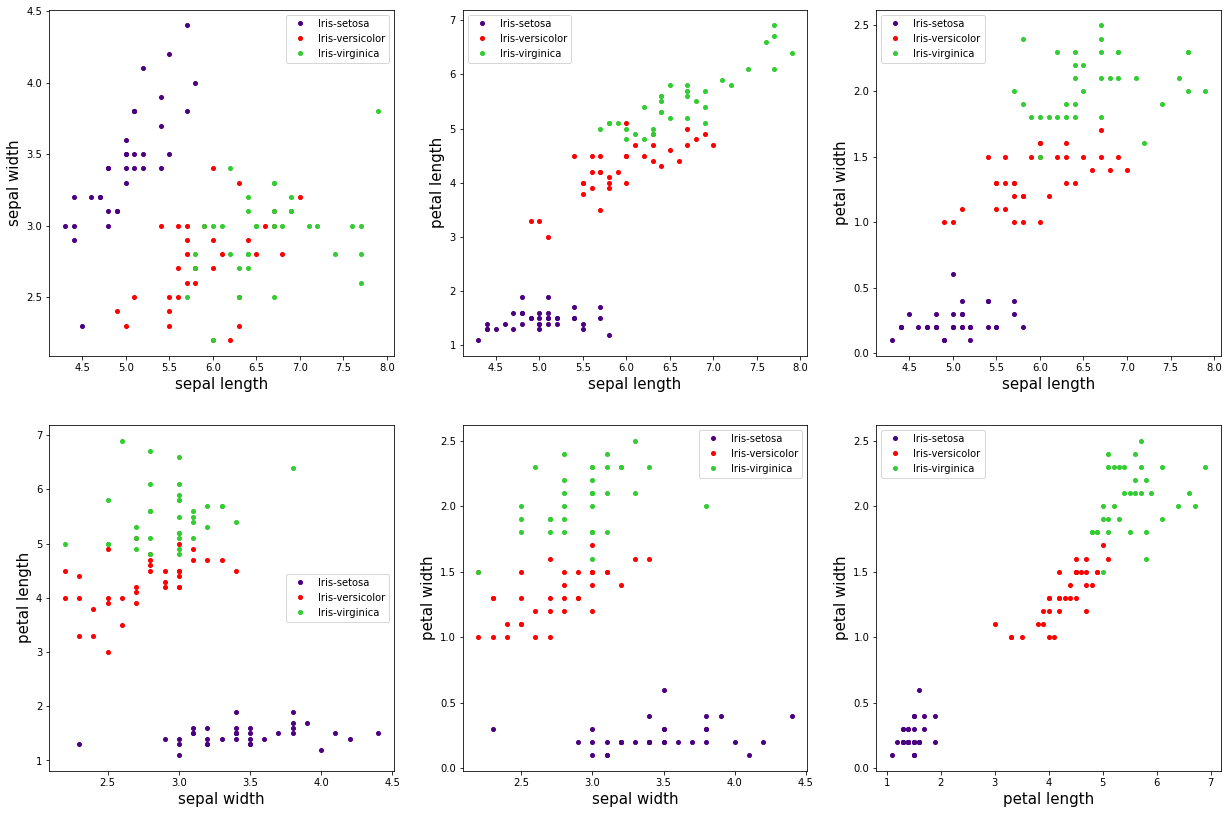

In [133]:
Y = df['class']
X = df.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.3,random_state=41,stratify=Y)
# sns.histplot(Y_train)

df_train  = pd.concat([X_train,Y_train],axis=1)
features = X_train.columns

class_wise_data = []
for i in np.unique(Y_train):
    class_wise_data.append(df_train[df_train['class']==i])

ix=1
plt.figure(figsize=(21,14))
for i,f1 in enumerate(features):
    for j in range(i+1,len(features)):
        f2=features[j]
        colors=['indigo','red','limegreen']
        plt.subplot(2,3,ix)
        for ii,c in enumerate(class_wise_data):
            plt.plot(c[f1],c[f2],label=c['class'].iloc[0],color=colors[ii],marker='o',markersize=4,linestyle='')        
        plt.legend()    
        plt.xlabel(f1,fontsize=15)
        plt.ylabel(f2,fontsize=15)
        ix+=1
plt.show()


B. Choose any three pairs of features (which you think will give good results), Train QDA
models for each pair, for the classification task. You can use the
QuadraticDiscriminantAnalysis function from sklearn. [10]

In [134]:
from sklearn import discriminant_analysis as DA

pairs=[('petal width','sepal length'),('petal width','sepal width'),('petal width','petal length')]
all_X = []
qdas = []

for i,p in enumerate(pairs):
    curr_X = pd.concat([df_train[p[1]],df_train[p[0]]],axis=1)
    all_X.append(curr_X)
    qda = DA.QuadraticDiscriminantAnalysis(store_covariance=True)
    qda.fit(curr_X,Y_train)
    qdas.append(qda)


C. Report the mean and covariance of the distributions found from each QDA model. [2]

In [135]:
for i,p in enumerate(pairs):
    print(f'For features [{p[1]}, {p[0]}] :\n')
    print('Mean :\n')
    print(np.array(qdas[i].means_))
    print('\nCovariance of Distributions :\n')
    print(np.array(qdas[i].covariance_))
    print('-'*100)
    print()

For features [sepal length, petal width] :

Mean :

[[5.01428571 0.24      ]
 [5.96       1.32571429]
 [6.64571429 2.04857143]]

Covariance of Distributions :

[[[0.15008403 0.01147059]
  [0.01147059 0.01070588]]

 [[0.28129412 0.06311765]
  [0.06311765 0.04137815]]

 [[0.35667227 0.03359664]
  [0.03359664 0.05845378]]]
----------------------------------------------------------------------------------------------------

For features [sepal width, petal width] :

Mean :

[[3.44571429 0.24      ]
 [2.74571429 1.32571429]
 [2.93714286 2.04857143]]

Covariance of Distributions :

[[[0.17255462 0.00988235]
  [0.00988235 0.01070588]]

 [[0.09961345 0.03878992]
  [0.03878992 0.04137815]]

 [[0.08887395 0.03108403]
  [0.03108403 0.05845378]]]
----------------------------------------------------------------------------------------------------

For features [petal length, petal width] :

Mean :

[[1.47142857 0.24      ]
 [4.28       1.32571429]
 [5.53142857 2.04857143]]

Covariance of Distributi


D. Plot the decision boundary given by the QDA models on top of the corresponding
scatterplot visualization of the data. [10]

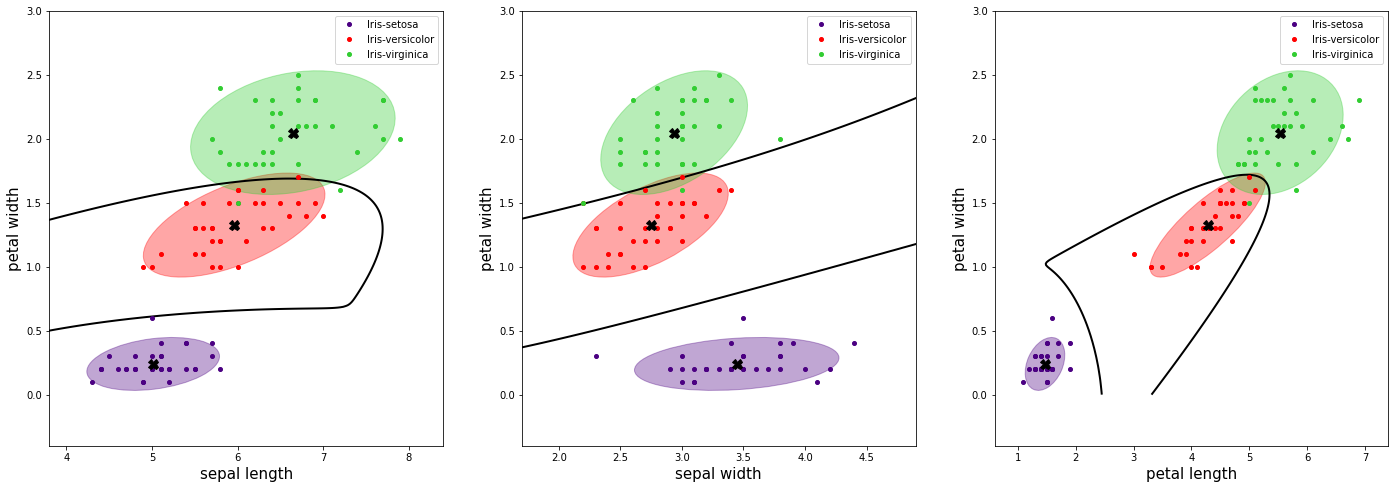

In [136]:
import matplotlib
from scipy import linalg

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi 
    ell = matplotlib.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.35)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"X",color="black",markersize=10)

ix=1
plt.figure(figsize=(24,8))
for i,p in enumerate(pairs):
    colors=['indigo','red','limegreen']
    splot = plt.subplot(1,3,ix)

    xx, yy = np.meshgrid(np.linspace(1, 9, 250), np.linspace(0, 3, 250))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    
    min_x=1000
    min_y=1000
    max_x=-1000
    max_y=-1000
    for ii,c in enumerate(class_wise_data):
        splot.plot(c[p[1]],c[p[0]],label=c['class'].iloc[0],color=colors[ii],marker='o',markersize=4,linestyle='')
        plot_ellipse(splot, qdas[i].means_[ii], qdas[i].covariance_[ii], colors[ii])
        min_x=min(min(c[p[1]]),min_x)
        min_y=min(min(c[p[0]]),min_y)
        max_x=max(max(c[p[1]]),max_x)
        max_y=max(max(c[p[0]]),max_y)
    probabilities_qda = qdas[i].predict_proba(X_grid)[:,1].reshape(xx.shape)
    plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2, colors='black')

    plt.legend()
    plt.xlabel(p[1],fontsize=15)
    plt.ylabel(p[0],fontsize=15)
    plt.xlim(min_x-0.5,max_x+0.5)
    plt.ylim(min_y-0.5,max_y+0.5)
    ix+=1

plt.show()

E. Predict the test data and report error rate for each case. Which pair of features do you
think gives the best result and why? [5]

In [137]:
best_model = 0
best_pair = tuple()
min_err = 0
accs=[]

for i,p in enumerate(pairs):
    ypred = qdas[i].predict(pd.concat([X_test[p[1]],X_test[p[0]]],axis=1))
    curr_acc = metrics.accuracy_score(Y_test,ypred)
    accs.append(curr_acc)
    if max(accs)==curr_acc:
        best_model = i
        best_pair = p
        min_err = 1-curr_acc

print(f'We got following Error Rates for the following pairs :\n')
for i in range(3):
    print(f'For [{pairs[i][1]} , {pairs[i][0]}] : {1-accs[i]:.4f}')

print(f'\nHence the best model is obtained from the pair [{best_pair[0]} , {best_pair[1]}]')
print(f'Minimum Error Rate : {min_err:.4f}')
print(f'Maximum Accuracy : {(1-min_err)*100:.2f} %')

We got following Error Rates for the following pairs :

For [sepal length , petal width] : 0.0667
For [sepal width , petal width] : 0.0667
For [petal length , petal width] : 0.0444

Hence the best model is obtained from the pair [petal width , petal length]
Minimum Error Rate : 0.0444
Maximum Accuracy : 95.56 %



F. Take the pair of features that has given the best result and train LDA model with same
training data. You can use the LinearDiscriminantAnalysis function from sklearn. [5]

In [138]:
lda = DA.LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(all_X[best_model],Y_train)

LinearDiscriminantAnalysis(store_covariance=True)


G. Plot the decision boundary given by the LDA model on top of the scatterplot visualization
of the data. [2]

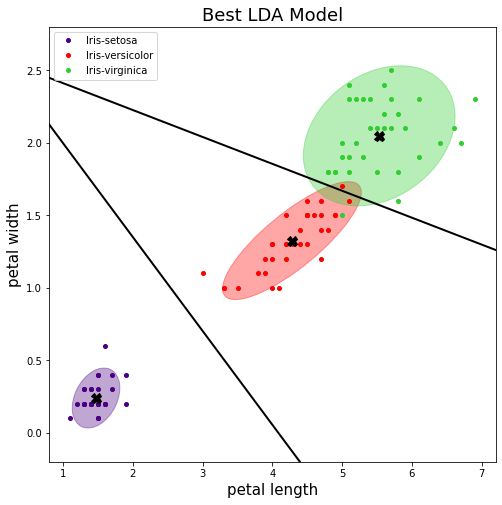

In [139]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi 
    ell = matplotlib.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.35)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"X",color="black",markersize=10)

plt.figure(figsize=(8,8))
for i,p in enumerate(list([best_pair])):
    colors=['indigo','red','limegreen']
    splot = plt.subplot(1,1,1)

    xx, yy = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    
    min_x=1000
    min_y=1000
    max_x=-1000
    max_y=-1000
    for ii,c in enumerate(class_wise_data):
        splot.plot(c[p[1]],c[p[0]],label=c['class'].iloc[0],color=colors[ii],marker='o',markersize=4,linestyle='')
        plot_ellipse(splot, qdas[best_model].means_[ii], qdas[best_model].covariance_[ii], colors[ii])
        min_x=min(min(c[p[1]]),min_x)
        min_y=min(min(c[p[0]]),min_y)
        max_x=max(max(c[p[1]]),max_x)
        max_y=max(max(c[p[0]]),max_y)
    probabilities_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
    plt.contour(xx, yy, probabilities_lda, [0.5], linewidths=2, colors=['black'])
    plt.title('Best LDA Model',fontsize=18)
    plt.legend()
    plt.xlabel(p[1],fontsize=15)
    plt.ylabel(p[0],fontsize=15)
    plt.xlim(min_x-0.3,max_x+0.3)
    plt.ylim(min_y-0.3,max_y+0.3)
    ix+=1

plt.show()


H. Report the error rate on the test data for LDA model. Which one between LDA and QDA
has performed better do you think? Justify your answer. [3]

In [140]:
ypreds = lda.predict(pd.concat([X_test[best_pair[1]],X_test[best_pair[0]]],axis=1))
lda_acc = metrics.accuracy_score(Y_test,ypreds)
print('For best LDA Model, following are the metrics :')
print(f'Error Rate : {1-lda_acc:.4f}')
print(f'Accuracy score : {lda_acc*100:.2f} %')

For best LDA Model, following are the metrics :
Error Rate : 0.0889
Accuracy score : 91.11 %



I. Visualize the gaussian distributions obtained from QDA and LDA. (you can draw ellipse
as shown in demo or you can use any other function to visualize.) [5]

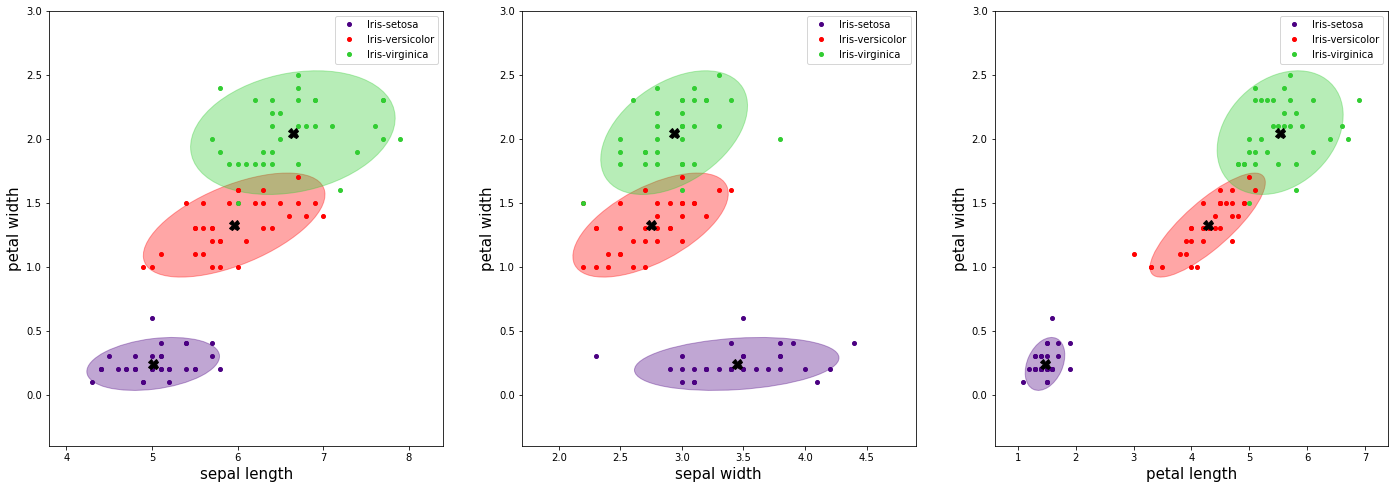

In [141]:
ix=1
plt.figure(figsize=(24,8))
for i,p in enumerate(pairs):
    colors=['indigo','red','limegreen']
    splot = plt.subplot(1,3,ix)
    
    min_x=1000
    min_y=1000
    max_x=-1000
    max_y=-1000
    for ii,c in enumerate(class_wise_data):
        splot.plot(c[p[1]],c[p[0]],label=c['class'].iloc[0],color=colors[ii],marker='o',markersize=4,linestyle='')
        plot_ellipse(splot, qdas[i].means_[ii], qdas[i].covariance_[ii], colors[ii])
        min_x=min(min(c[p[1]]),min_x)
        min_y=min(min(c[p[0]]),min_y)
        max_x=max(max(c[p[1]]),max_x)
        max_y=max(max(c[p[0]]),max_y)

    plt.legend()
    plt.xlabel(p[1],fontsize=15)
    plt.ylabel(p[0],fontsize=15)
    plt.xlim(min_x-0.5,max_x+0.5)
    plt.ylim(min_y-0.5,max_y+0.5)
    ix+=1

plt.show()

***

### **Q2.. Use the iris dataset as given in the above question and assume that the data follows the gaussian distribution. Do the preprocessing of the data and consider only petal length and petal width features for the below questions. [30]**
a) From the data, find out the sample mean and sample covariance matrix of each class
and visualize the gaussian distribution using the obtained sample mean and sample
covariance matrix. [5]

In [142]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))
    
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi 
    ell = matplotlib.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.35)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"X",color="black",markersize=10)

X_train2 = pd.concat([X_train['petal length'],X_train['petal width']],axis=1)

means = []
vars = []
for i,c in enumerate(class_wise_data):
    m = []
    v = []
    for f in ['petal length','petal width']:
        m.append(np.mean(c[f]))
        v.append(np.var(c[f]))
    means.append(m)
    vars.append(v)

cov_matrix = [np.zeros((2,2)) for x in range(3)]

for i,c in enumerate(class_wise_data):
    cov_matrix[i] = np.cov([np.array(c['petal length']),np.array(c['petal width'])])

cov_matrix = np.array(cov_matrix)
means=np.array(means)

print(f'Sample Mean for Petal Length and Petal Width : \n{means}\n')
print(f'Sample Covariance Matrix for Petal Length and Petal Width : \n{cov_matrix}\n')

Sample Mean for Petal Length and Petal Width : 
[[1.47142857 0.24      ]
 [4.28       1.32571429]
 [5.53142857 2.04857143]]

Sample Covariance Matrix for Petal Length and Petal Width : 
[[[0.02915966 0.00588235]
  [0.00588235 0.01070588]]

 [[0.24752941 0.08258824]
  [0.08258824 0.04137815]]

 [[0.2957479  0.03695798]
  [0.03695798 0.05845378]]]



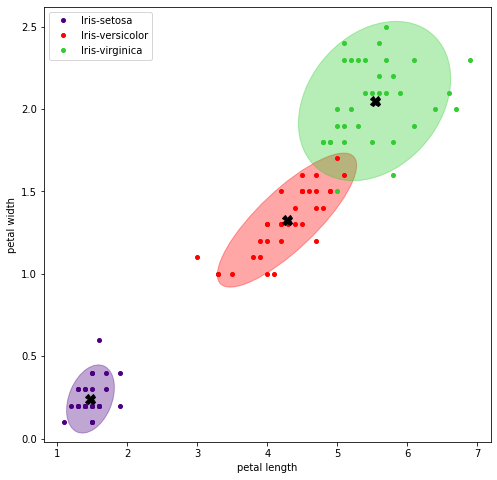

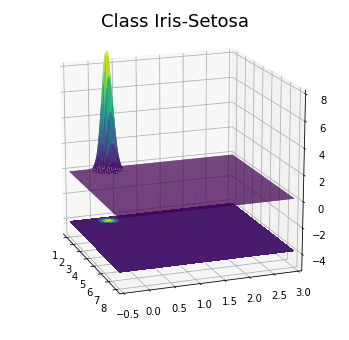

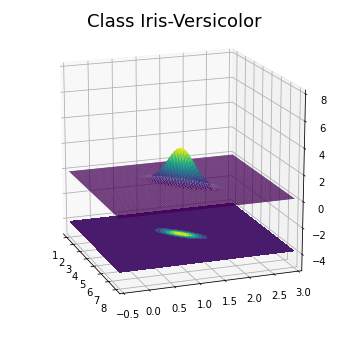

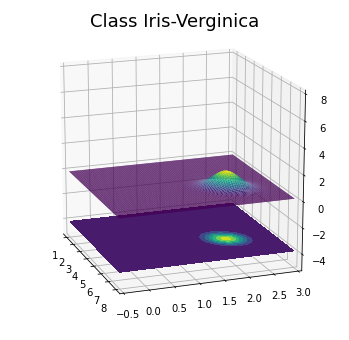

In [143]:
plt.figure(figsize=(8,8))
colors=['indigo','red','limegreen']
splot = plt.subplot(1,1,1)
for i,c in enumerate(class_wise_data):
    splot.plot(c['petal length'],c['petal width'],label=c['class'].iloc[0],color=colors[i],marker='o',markersize=4,linestyle='')
    plot_ellipse(splot, means[i], cov_matrix[i], colors[i])

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.plot()

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

N = 250
Xx = np.linspace(1,8, N)
Yy = np.linspace(-0.5, 3, N)
Xx, Yy = np.meshgrid(Xx, Yy)

def multivariate_gaussian(pos, mu, Sigma):
        """Return the multivariate Gaussian distribution on array pos.

        pos is an array constructed by packing the meshed arrays of variables
        x_1, x_2, x_3, ..., x_k into its _last_ dimension.

        """

        n = mu.shape[0]
        Sigma_det = np.linalg.det(Sigma)
        Sigma_inv = np.linalg.inv(Sigma)
        N = np.sqrt((2*np.pi)**n * Sigma_det)
        fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

        return np.exp(-fac / 2) / N

classes = ['Iris-Setosa','Iris-Versicolor','Iris-Verginica']

for i in range(3):
    mu = means[i].T
    Sigma = cov_matrix[i].T
    pos = np.empty(Xx.shape + (2,))
    pos[:, :, 0] = Xx
    pos[:, :, 1] = Yy

    Zz = multivariate_gaussian(pos, mu, Sigma)

    fig = plt.figure(figsize=(6,6))
    ax = fig.gca(projection='3d')
    ax.plot_surface(Xx, Yy, Zz, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.viridis)

    cset = ax.contourf(Xx, Yy, Zz, zdir='z', offset=-4, cmap=cm.viridis)

    ax.set_zlim(-5,8)
    ax.set_ylim(-0.5,3)
    ax.view_init(17, -20)
    plt.title(f'Class {classes[i]}',fontsize=18)
    plt.show()


b) Write a function compute_likelihood to compute the likelihood of data given the
parameters mean and covariance matrix assuming gaussian distribution. [10]

In [144]:
def compute_likelihood(row,means,covs):
    covs_inv = np.linalg.inv(covs)
    row = np.array(row)
    row = row.reshape(-1,1)
    means = means.reshape(-1,1)
    deno = np.sqrt((2 * np.pi)**covs.shape[0] * np.linalg.det(covs))
    exp = (-1/2) * ((row - means).T @ covs_inv @ (row - means))
    return 1.0*(np.exp(exp))/deno


c) Write a function to perform maximum likelihood estimation over the training dataset to
determine mean and covariance and classify it using Bayes classifier. Report the
parameters obtained for each class. [10]

In [145]:
lks = []

def decode_class(s):
    if s=='Iris-setosa':
        return 0
    if s=='Iris-versicolor':
        return 1
    return 2

means_mle = []
cov_matrix_mle = [np.zeros((2,2)) for x in range(3)]

for i,c in enumerate(class_wise_data):
    m = []
    for f in ['petal length','petal width']:
        m.append(np.mean(c[f]))
    means_mle.append(m)
    cov_matrix_mle[i] = np.cov([np.array(c['petal length']),np.array(c['petal width'])])*1.75

cov_matrix_mle = np.array(cov_matrix_mle)
means_mle=np.array(means_mle)

def MLE(row, c):
    covs = cov_matrix[c]
    covs_inv = np.linalg.inv(covs)
    row = row.reshape(-1,1)
    mean = means[c]
    mean = mean.reshape(-1,1)
    deno = np.sqrt((2 * np.pi)**covs.shape[0] * np.linalg.det(covs))
    exp = (-1/2) * ((row - mean).T @ covs_inv @ (row - mean))
    return 1.0*(np.exp(exp))/deno

for i in range(len(X_train2)):
    mle = MLE(np.array(X_train2.iloc[i]),decode_class(Y_train.iloc[i]))
    lks.append(np.ravel(mle)[0])


d) Visualize the gaussian distribution from mean and covariance of both the above parts (a
and c) in a single plot. [3]

The lighter visualization is obtained from means and covariance after MLE.
The darker one is obtained from Mean, Covariance without MLE.


[]

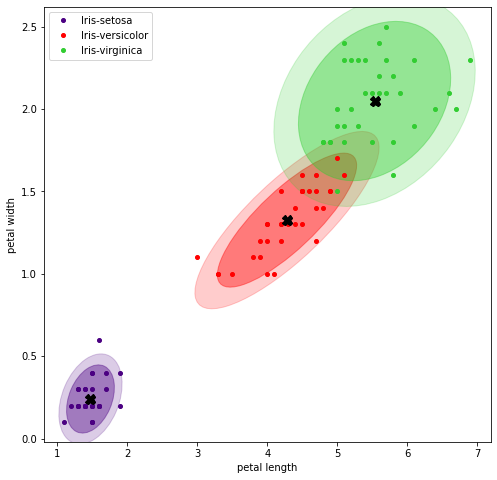

In [146]:
def plot_ellipse(splot, mean, cov, color, alpha):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi 
    ell = matplotlib.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(alpha)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"X",color="black",markersize=10)

print('The lighter visualization is obtained from means and covariance after MLE.\nThe darker one is obtained from Mean, Covariance without MLE.')
plt.figure(figsize=(8,8))
colors=['indigo','red','limegreen']
splot = plt.subplot(1,1,1)
for i,c in enumerate(class_wise_data):
    splot.plot(c['petal length'],c['petal width'],label=c['class'].iloc[0],color=colors[i],marker='o',markersize=4,linestyle='')
    plot_ellipse(splot, means[i], cov_matrix[i], colors[i],0.4)
    plot_ellipse(splot, means_mle[i], cov_matrix_mle[i], colors[i],0.2)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.plot()


e) Predict the test data and compare the performance obtained in question1(with QDA).[2]

In [147]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
nb_acc = metrics.accuracy_score(Y_test, y_pred)

print(f'Accuracy obtained by Naive Bayes Classifier :\nAccuracy : {nb_acc*100:.2f} %\n')
print(f'Accuracy obtained by QDA :\nAccuracy : {(1-min_err)*100:.2f} %')

Accuracy obtained by Naive Bayes Classifier :
Accuracy : 91.11 %

Accuracy obtained by QDA :
Accuracy : 95.56 %


***

### **Q3. Consider the following dataset that contains: [25]**   [dataset](https://drive.google.com/drive/folders/13-1uWVfoDHoxioDcKQw9ISYliKhxHzeq?usp=sharing) 

You will need to implement the Naive Bayes algorithm to classify a news corpus into 20 different
categories.
* train.data - Which contains bag-of-words data for each training document. Each row of
the file represents the number of occurrences of a particular term in some document.
The format of each row is (docId, termId, Count).
* train.label - That contains a label for each document in the training data.
* test.data - Contains bag-of-words data for each testing document. The format of this file
is the same as that of the train.data file.
* test.label - Contains a label for each document in the testing data.
Perform following operations:


In [148]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

dir = '/content/drive/MyDrive/Colab Notebooks/Lab 5/data/'

X_train = pd.read_csv(dir+'train.data',sep=' ',header=None)
Y_train = pd.read_csv(dir+'train.label',sep=' ',header=None)
X_test = pd.read_csv(dir+'test.data',sep=' ',header=None)
Y_test = pd.read_csv(dir+'test.label',sep=' ',header=None)

X_train.columns=['docId','termId','Count']
Y_train.columns=['class']
X_test.columns=['docId','termId','Count']
Y_test.columns=['class']


In [149]:
dataset_train =X_train.copy()
def fun(x):
  return Y_train.iloc[x-1,0]
dataset_train['class'] = dataset_train['docId']
dataset_train['class'] = dataset_train['class'].apply(fun)
dataset_train.head()

,docId,termId,Count,class
0,1,1,4,1
1,1,2,2,1
2,1,3,10,1
3,1,4,4,1
4,1,5,2,1


In [150]:
dataset_test =X_test.copy()
dataset_test['class'] = dataset_test['docId']
dataset_test['class'] = dataset_test['class'].apply(fun)

In [155]:
xtrain, _, ytrain, __ = tts(X_train,dataset_train['class'],test_size=0.99,random_state=41,stratify=dataset_train['class'])


1. Compute the likelihood of the training data-set( without using any standard library). [5]

In [159]:
likelihoods = []

def compute_likelihood(row,means,covs):
    covs_inv = np.linalg.inv(covs)
    row = np.array(row)
    row = row.reshape(-1,1)
    means = means.reshape(-1,1)
    deno = np.sqrt((2 * np.pi)**covs.shape[0] * np.linalg.det(covs))
    exp = (-1/2) * ((row - means).T @ covs_inv @ (row - means))
    return 1.0*(np.exp(exp))/deno

2. Smoothing is a technique that helps tackle the problem of zero probability in the Naïve
Bayes algorithm. Apply Laplace smoothing to solve the zero observations problem on a
training data-set from scratch (without using any standard library). [10]

In [157]:
def smoothened_lk(row,means,covs,alpha):
    covs_inv = np.linalg.inv(covs)
    row = np.array(row)
    row = row.reshape(-1,1)
    means = means.reshape(-1,1)
    deno = np.sqrt((2 * np.pi)**covs.shape[0] * np.linalg.det(covs))
    exp = (-1/2) * ((row - means).T @ covs_inv @ (row - means))
    return 1.0*(np.exp(exp)+alpha)/deno+alpha*20


3. naiveBayesClassify(trainData, trainLabels, testData) - Classifies the data using the
Naive Bayes algorithm. [10]

In [158]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(xtrain, ytrain).predict(X_test)
nb_acc = metrics.accuracy_score(dataset_test['class'], y_pred)

print(f'Accuracy obtained by Naive Bayes Classifier :\nAccuracy : {nb_acc*100:.2f} %\n')
print(f'Accuracy obtained by QDA :\nAccuracy : {(1-min_err)*100:.2f} %')

Accuracy obtained by Naive Bayes Classifier :
Accuracy : 91.67 %

Accuracy obtained by QDA :
Accuracy : 95.56 %
